In [14]:
import numpy as np
import pandas as pd

In [15]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter

In [17]:
#NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [53]:
#machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [50]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [45]:
def load_data(file_path):
  df = pd.read_csv(file_path)
  print('Data loaded succesfully')
  print(f"shape: {df.shape}")
  print(f"\nColumns: {df.columns.tolist()}")
  print(f"\nFirst few rowns :{df.head()}")
  return df

In [46]:

def explore_data(df, text_column, sentiment_column):
    """Explore the dataset"""
    print("\n" + "="*50)
    print("DATA EXPLORATION")
    print("="*50)

    # Check for missing values
    print(f"\nMissing values:\n{df.isnull().sum()}")

    # Sentiment distribution
    print(f"\nSentiment distribution:\n{df[sentiment_column].value_counts()}")

    # Visualize sentiment distribution
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    df[sentiment_column].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    df[sentiment_column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Sentiment Distribution (%)')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

    return df

In [47]:
def explore_data(df, text_column, sentiment_column):
    """Explore the dataset"""
    print("\n" + "="*50)
    print("DATA EXPLORATION")
    print("="*50)

    # Check for missing values
    print(f"\nMissing values:\n{df.isnull().sum()}")

    # Sentiment distribution
    print(f"\nSentiment distribution:\n{df[sentiment_column].value_counts()}")

    # Visualize sentiment distribution
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    df[sentiment_column].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    df[sentiment_column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Sentiment Distribution (%)')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

    return df

In [48]:
def explore_data(df, text_column, sentiment_column):
    """Explore the dataset"""
    print("\n" + "="*50)
    print("DATA EXPLORATION")
    print("="*50)

    # Check for missing values
    print(f"\nMissing values:\n{df.isnull().sum()}")

    # Sentiment distribution
    print(f"\nSentiment distribution:\n{df[sentiment_column].value_counts()}")

    # Visualize sentiment distribution
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    df[sentiment_column].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    df[sentiment_column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Sentiment Distribution (%)')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

    return df

In [26]:
def clean_text(text):
    """Clean text data"""
    if pd.isna(text):
        return ""

    # Convert to lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def preprocess_data(df, text_column):
    """Preprocess the text data"""
    print("\n" + "="*50)
    print("DATA PREPROCESSING")
    print("="*50)

    # Clean text
    print("Cleaning text...")
    df['cleaned_text'] = df[text_column].apply(clean_text)

    # Remove stop words and lemmatize
    print("Removing stop words and lemmatizing...")
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def process_text(text):
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word) for word in tokens
                  if word not in stop_words and len(word) > 2]
        return ' '.join(tokens)

    df['processed_text'] = df['cleaned_text'].apply(process_text)

    # Remove empty rows
    df = df[df['processed_text'].str.len() > 0]

    print(f"Data after preprocessing: {df.shape}")
    print(f"\nSample processed text:\n{df['processed_text'].head()}")

    return df

In [27]:
def analyze_sentiments(df, sentiment_column):
    """Analyze text patterns in each sentiment"""
    print("\n" + "="*50)
    print("EXPLORATORY DATA ANALYSIS")
    print("="*50)

    # Text length analysis
    df['text_length'] = df['processed_text'].str.len()
    df['word_count'] = df['processed_text'].str.split().str.len()

    print(f"\nText statistics by sentiment:")
    print(df.groupby(sentiment_column)[['text_length', 'word_count']].describe())

    # Visualize text length distribution
    plt.figure(figsize=(12, 4))

    for i, sentiment in enumerate(df[sentiment_column].unique(), 1):
        plt.subplot(1, 3, i)
        sentiment_data = df[df[sentiment_column] == sentiment]['word_count']
        plt.hist(sentiment_data, bins=30, alpha=0.7, edgecolor='black')
        plt.title(f'{sentiment.capitalize()} - Word Count')
        plt.xlabel('Word Count')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Most common words per sentiment
    print("\nMost common words per sentiment:")
    for sentiment in df[sentiment_column].unique():
        sentiment_text = ' '.join(df[df[sentiment_column] == sentiment]['processed_text'])
        words = sentiment_text.split()
        common_words = Counter(words).most_common(10)
        print(f"\n{sentiment.upper()}:")
        for word, count in common_words:
            print(f"  {word}: {count}")

    return df

def create_wordclouds(df, sentiment_column):
    """Create word clouds for each sentiment"""
    print("\nGenerating word clouds...")

    sentiments = df[sentiment_column].unique()
    fig, axes = plt.subplots(1, len(sentiments), figsize=(15, 5))

    if len(sentiments) == 1:
        axes = [axes]

    for idx, sentiment in enumerate(sentiments):
        text = ' '.join(df[df[sentiment_column] == sentiment]['processed_text'])

        wordcloud = WordCloud(width=400, height=400,
                             background_color='white',
                             colormap='viridis').generate(text)

        axes[idx].imshow(wordcloud, interpolation='bilinear')
        axes[idx].set_title(f'{sentiment.capitalize()} Sentiment', fontsize=14)
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

In [28]:
def extract_features(df, sentiment_column):
    """Extract features using TF-IDF"""
    print("\n" + "="*50)
    print("FEATURE EXTRACTION")
    print("="*50)

    # Prepare data
    X = df['processed_text']
    y = df[sentiment_column]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")

    # TF-IDF Vectorization
    print("\nApplying TF-IDF vectorization...")
    tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    print(f"Feature matrix shape: {X_train_tfidf.shape}")

    return X_train_tfidf, X_test_tfidf, y_train, y_test, tfidf

In [29]:
def train_models(X_train, X_test, y_train, y_test):
    """Train multiple classification models"""
    print("\n" + "="*50)
    print("MODEL TRAINING")
    print("="*50)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Naive Bayes': MultinomialNB(),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
    }

    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {'model': model, 'predictions': y_pred, 'accuracy': accuracy}
        print(f"{name} Accuracy: {accuracy:.4f}")

    return results

In [30]:
def evaluate_models(results, y_test):
    """Evaluate and visualize model performance"""
    print("\n" + "="*50)
    print("MODEL EVALUATION")
    print("="*50)

    # Compare accuracies
    accuracies = {name: res['accuracy'] for name, res in results.items()}

    plt.figure(figsize=(10, 5))
    plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
    plt.title('Model Comparison', fontsize=14)
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, (name, acc) in enumerate(accuracies.items()):
        plt.text(i, acc + 0.02, f'{acc:.3f}', ha='center')
    plt.tight_layout()
    plt.show()

    # Best model
    best_model_name = max(accuracies, key=accuracies.get)
    print(f"\nBest Model: {best_model_name}")

    # Detailed evaluation for best model
    y_pred = results[best_model_name]['predictions']

    print(f"\nClassification Report for {best_model_name}:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))

    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.tight_layout()
    plt.show()

    return results[best_model_name]['model']

In [31]:
def sentiment_analysis_pipeline(file_path, text_column, sentiment_column):
    """Complete sentiment analysis pipeline"""

    # Step 1: Load data
    df = load_data(file_path)

    # Step 2: Explore data
    df = explore_data(df, text_column, sentiment_column)

    # Step 3: Preprocess data
    df = preprocess_data(df, text_column)

    # Step 4: EDA
    df = analyze_sentiments(df, sentiment_column)
    create_wordclouds(df, sentiment_column)

    # Step 5: Feature extraction
    X_train, X_test, y_train, y_test, tfidf = extract_features(df, sentiment_column)

    # Step 6: Train models
    results = train_models(X_train, X_test, y_train, y_test)

    # Step 7: Evaluate models
    best_model = evaluate_models(results, y_test)

    print("\n" + "="*50)
    print("PIPELINE COMPLETED!")
    print("="*50)

    return best_model, tfidf

In [35]:
if __name__ == "__main__":
    # Replace with your file path and column names
    FILE_PATH = '/content/reddit_artist_posts_sentiment.csv'
    TEXT_COLUMN = 'text'  # Column containing the text
    SENTIMENT_COLUMN = 'label'  # Column containing sentiment labels

    # Run pipeline
    model, vectorizer = sentiment_analysis_pipeline(FILE_PATH, TEXT_COLUMN, SENTIMENT_COLUMN)

    # Predict on new text
    def predict_sentiment(text, model, vectorizer):
        """Predict sentiment for new text"""
        cleaned = clean_text(text)
        transformed = vectorizer.transform([cleaned])
        prediction = model.predict(transformed)
        return prediction[0]

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/reddit-sentiment-analysis-dataset-for-nlp-projects/reddit_artist_posts_sentiment.csv'

Data loaded succesfully
shape: (31948, 2)

Columns: ['text', 'label']

First few rowns :                                                text     label
0  pitchfork track review: taylor swift’s “actual...  negative
1  taylor swift has regained the masters of her f...  positive
2  pitchfork review: taylor swift - the life of a...   neutral
3                  taylor swift announced engagement   neutral
4  taylor swift - the fate of ophelia (official m...   neutral

DATA EXPLORATION

Missing values:
text     0
label    0
dtype: int64

Sentiment distribution:
label
neutral     19728
positive     8825
negative     3395
Name: count, dtype: int64


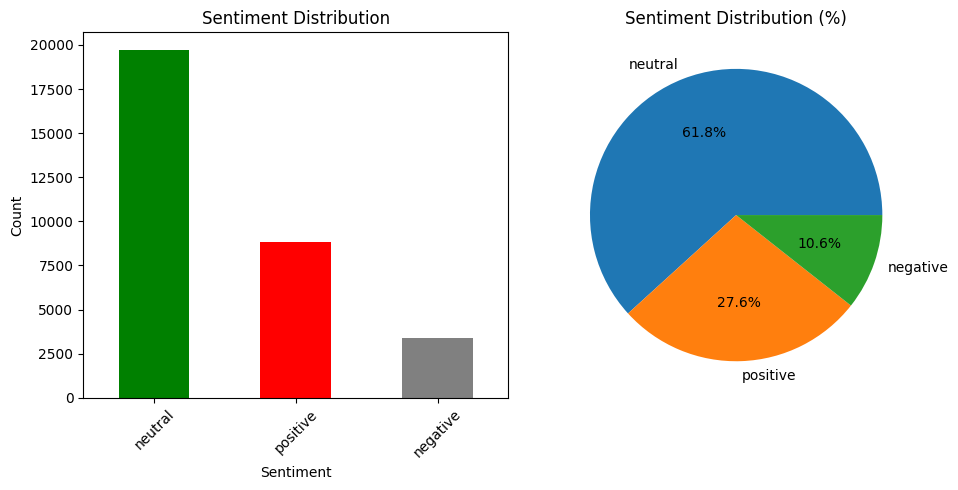


DATA PREPROCESSING
Cleaning text...
Removing stop words and lemmatizing...
Data after preprocessing: (31930, 4)

Sample processed text:
0    pitchfork track review taylor swift actually r...
1         taylor swift regained master first six album
2          pitchfork review taylor swift life showgirl
3                    taylor swift announced engagement
4       taylor swift fate ophelia official music video
Name: processed_text, dtype: object

EXPLORATORY DATA ANALYSIS

Text statistics by sentiment:
         text_length                                                       \
               count       mean        std  min   25%   50%    75%    max   
label                                                                       
negative      3391.0  77.669124  39.931847  3.0  50.0  69.0  100.0  207.0   
neutral      19722.0  59.426732  34.726125  3.0  35.0  52.0   74.0  233.0   
positive      8817.0  73.618691  41.218204  3.0  44.0  65.0   96.0  245.0   

         word_count            

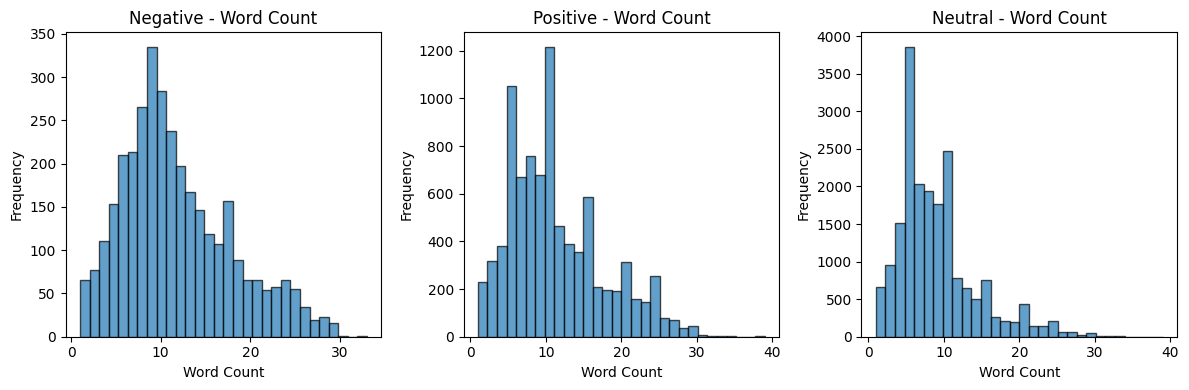


Most common words per sentiment:

NEGATIVE:
  music: 552
  taylor: 534
  swift: 488
  song: 472
  tour: 440
  concert: 425
  like: 422
  fan: 342
  dont: 271
  billie: 267

POSITIVE:
  song: 1664
  music: 1442
  taylor: 1292
  billie: 1054
  album: 983
  pop: 916
  best: 873
  swift: 839
  new: 817
  love: 763

NEUTRAL:
  taylor: 3113
  music: 2674
  tour: 2278
  swift: 2271
  billie: 1831
  song: 1797
  ariana: 1569
  concert: 1523
  olivia: 1354
  album: 1321

Generating word clouds...


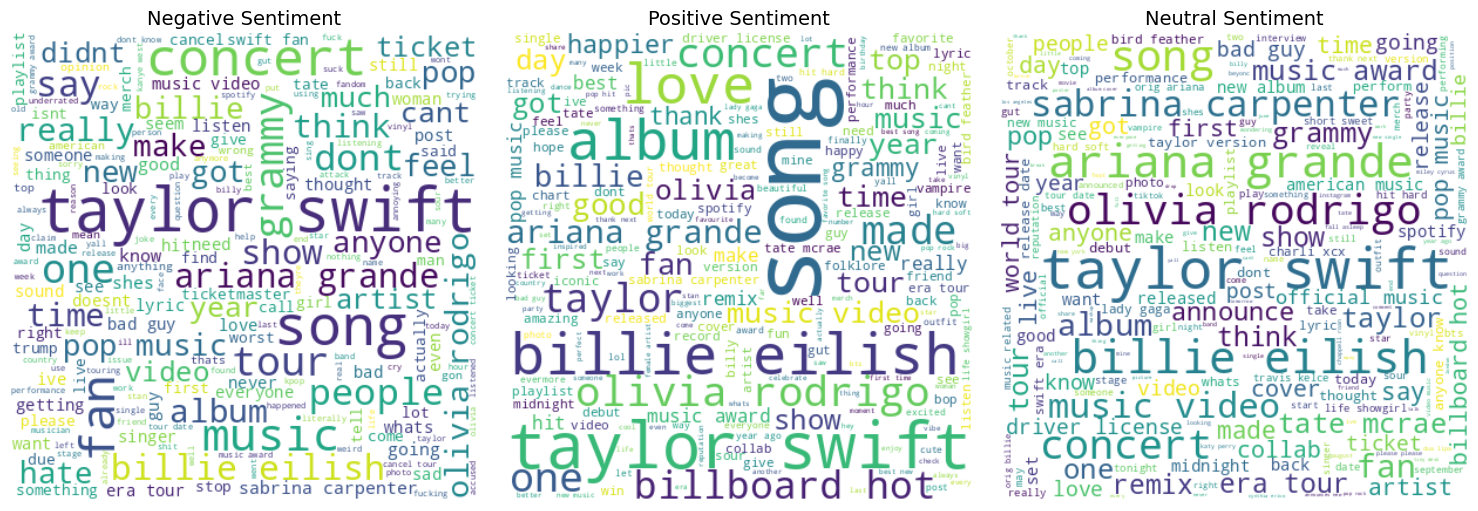


FEATURE EXTRACTION
Training set size: 25544
Testing set size: 6386

Applying TF-IDF vectorization...
Feature matrix shape: (25544, 5000)

MODEL TRAINING

Training Logistic Regression...
Logistic Regression Accuracy: 0.7661

Training Naive Bayes...
Naive Bayes Accuracy: 0.7324

Training Random Forest...
Random Forest Accuracy: 0.7507

MODEL EVALUATION


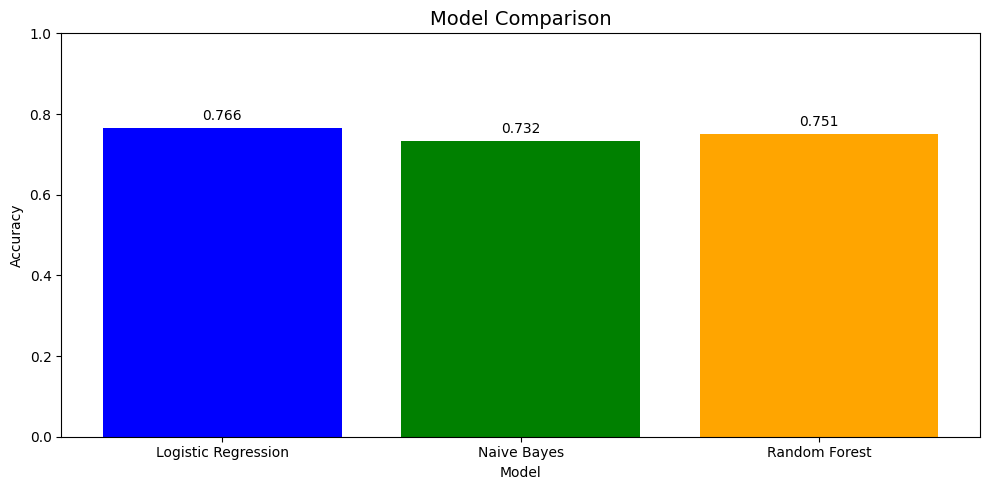


Best Model: Logistic Regression

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       0.65      0.32      0.43       678
     neutral       0.77      0.92      0.84      3945
    positive       0.77      0.60      0.68      1763

    accuracy                           0.77      6386
   macro avg       0.73      0.61      0.65      6386
weighted avg       0.76      0.77      0.75      6386



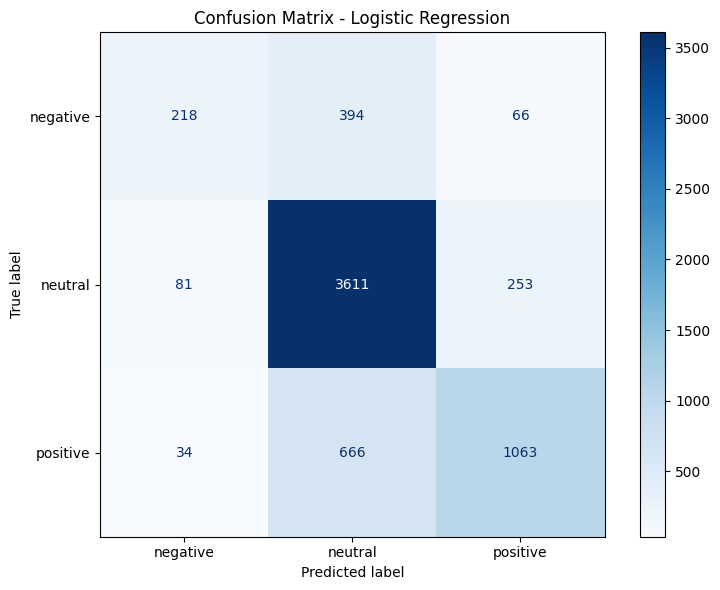


PIPELINE COMPLETED!


In [54]:
if __name__ == "__main__":
    # Replace with your file path and column names
    FILE_PATH = '/content/reddit_artist_posts_sentiment.csv'
    TEXT_COLUMN = 'text'  # Column containing the text
    SENTIMENT_COLUMN = 'label'  # Column containing sentiment labels

    # Run pipeline
    model, vectorizer = sentiment_analysis_pipeline(FILE_PATH, TEXT_COLUMN, SENTIMENT_COLUMN)

    # Predict on new text
    def predict_sentiment(text, model, vectorizer):
        """Predict sentiment for new text"""
        cleaned = clean_text(text)
        transformed = vectorizer.transform([cleaned])
        prediction = model.predict(transformed)
        return prediction[0]


In [59]:
new_text = input("Enter the text for sentiment prediction: ")
prediction = predict_sentiment(new_text, model,vectorizer)
print(f"\nExample Prediction:")
print(f"Text : {new_text}")
print(f"predicted Sentiment:{prediction}")

Enter the text for sentiment prediction: you are so bad person

Example Prediction:
Text : you are so bad person
predicted Sentiment:neutral


In [60]:
import pickle

# Define filenames for the model and vectorizer
model_filename = 'sentiment_model.pkl'
vectorizer_filename = 'tfidf_vectorizer.pkl'

# Save the trained model
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
print(f"Trained model saved as {model_filename}")

# Save the TF-IDF vectorizer
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(vectorizer, file)
print(f"TF-IDF vectorizer saved as {vectorizer_filename}")

Trained model saved as sentiment_model.pkl
TF-IDF vectorizer saved as tfidf_vectorizer.pkl
